### -----------------------------------------------------------------
###       This script creates a nice mass_radius plot
###                 Oscar Barragan. May, 2017
###                Last modification Jan 2020
### -----------------------------------------------------------------

In [10]:
#Load libraries
from __future__ import print_function
import numpy as np
import wget
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
sns.set_color_codes()

In [62]:
#-----------------#
#--User controls--#
#-----------------#

#Select the precision in error bars for the planets 1 is 100%, 0.5 is 50%, etc.
precision_m = 1.5
precision_r = 1.5

#Select units, jupter or earth
units = 'earth'
#units = 'jupiter'

#Some plot controls
#Figure size in inches 
fsize = 25
is_plot_my_planets = True
is_plot_zeng_models = True


#select the mass and radius range with units "units"
if ( units == 'jupiter' ):
    min_m = 0.001
    max_m = 13.0
    min_r = 0.0
    max_r = 2.5
    semilog = True

if ( units == 'earth' ):
    min_m = 0.9
    max_m = 40.0
    min_r = 1.0
    max_r = 5.0
    semilog = True

In [69]:
#                 All the magic starts here!
#          Be careful if you modify belong this point
#----------------------------------------------------------------

#Default jupiter to earth masses transformation
mfact = 317.83
rfact = 11.209

#I use the well-characterized planets table available at
#http://www.astro.keele.ac.uk/jkt/tepcat/
fname = 'allplanets-csv.csv'
urlname = 'http://www.astro.keele.ac.uk/jkt/tepcat/allplanets-csv.csv'
#Download the updated table
if ( not os.path.isfile(fname)):
    fname = wget.download(urlname)

#Read the values of mass and radius
m,mle,mre,r,rle,rre = np.loadtxt(fname,delimiter=',',unpack=True,usecols=range(26,32),skiprows=1)
#By default tepcat values are in Jupiter units, let us change it to "units"
if ( units == 'earth' ):
    m = m * mfact
    mle = mle * mfact
    mre = mre * mfact
    r = r * rfact
    rle = rle * rfact
    rre = rre * rfact

#Let us store the index for the planets which are inside the range and have error bars 
#smaller than our selection criteria
good_index = []

for o in range(0,len(m)):
    if ( m[o] > min_m and r[o] > min_r and m[o] < max_m and r[o] < max_r ):
        if ( mle[o] / m[o] < precision_m and mre[o] / m[o] < precision_m ):
            if ( rle[o] / r[o] < precision_r and rre[o] / r[o] < precision_r ):
                good_index.append(o)

#Print the details
print("There are ", len(good_index), 'exoplanets')
print("between", min_m, ' and ', max_m,' ',units,' masses')
print("between", min_r, ' and ', max_r,' ',units,' radii')
print("with precision in mass better than ", precision_m)
print(" and precision in radius better than ", precision_r)

NameError: name 'os' is not defined

In [64]:
#----------------------------------------------------------
#   Load my_planets.csv data
#----------------------------------------------------------
pnam = np.loadtxt('my_planets.csv',usecols=[0],dtype=str,unpack=True,delimiter=',')
mp,mlep,mrep,rp,rlep,rrep  = np.loadtxt('my_planets.csv',usecols=[1,2,3,4,5,6],unpack=True,delimiter=',')

if ( mp.__class__ == np.float64 ):
    mp = np.asarray([mp])
    mlep = np.asarray([mlep])
    mrep = np.asarray([mrep])
    rp = np.asarray([rp])
    rlep = np.asarray([rlep])
    rrep = np.asarray([rrep])


#Let us store the index for the planets which are inside the range and have error bars 
#smaller than our selection criteria
good_index_myp = []

for o in range(0,len(mp)):
    if ( mp[o] > min_m and rp[o] > min_r and mp[o] < max_m and rp[o] < max_r ):
        if ( mlep[o] / mp[o] < precision_m and mrep[o] / mp[o] < precision_m ):
            if ( rlep[o] / rp[o] < precision_r and rrep[o] / rp[o] < precision_r ):
                good_index_myp.append(o)
#------------


myp = [None]*6
myp[0] = np.array(mp[good_index_myp])
myp[1] = np.array(mlep[good_index_myp])
myp[2] = np.array(mrep[good_index_myp])
myp[3] = np.array(rp[good_index_myp])
myp[4] = np.array(rlep[good_index_myp])
myp[5] = np.array(rrep[good_index_myp])

In [65]:
#----------------------------------------------------------
#             Add theoretical models
#----------------------------------------------------------

#Zeng models
#newzeng = np.loadtxt('newZeng.txt',unpack=True)
newzeng = np.loadtxt('mrtable3.txt',unpack=True,usecols=range(0,42))
#Zeng models are given in earth units, if necessary let us change it to Jupiter
if ( units == 'jupiter' ):
    newzeng[0] = newzeng[0] / mfact
    newzeng[1:] = newzeng[1:] / rfact

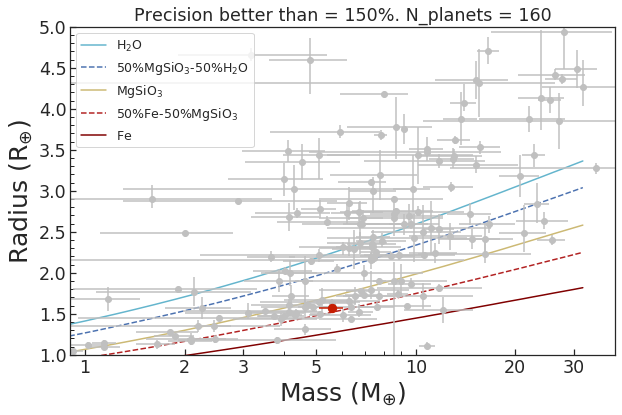

In [66]:
#----------------------------------------------------------
#             Start to create the plot
#----------------------------------------------------------

mark = ['D', 's', 'p', 'h', '8', '^', '<', '*', \
        'v','>','.', 'H', 'd','+']

#Create the xtics, this method is brute force!
xtics_vec = [0.01,0.02,0.03,0.04,0.05,0.08,0.1,0.2,0.3,0.4,0.5,0.8,1,2,3,4,5,8,10,20,30,40,50,80,100]
xtics_vec = [0.01,0.02,0.05,0.1,0.2,0.3,0.5,1,2,3,5,10,20,30,50,100]
xtics_vec_str = list(xtics_vec)
for o in range(0,len(xtics_vec)):
    xtics_vec_str[o] = str(xtics_vec[o]) 

a = fsize/2.56
plt.figure(1,figsize=(a,a/1.618))
plt.minorticks_on()
if ( units == 'earth' ):
    plt.ylabel('Radius ($\mathrm{R_{\oplus}}$)',fontsize=fsize)
    plt.xlabel('Mass ($\mathrm{M_{\oplus}}$)',fontsize=fsize)
elif ( units == 'jupiter' ):
    plt.ylabel('Radius ($\mathrm{R_{\mathrm{J}}}$)',fontsize=fsize)
    plt.xlabel('Mass ($\mathrm{M_{\mathrm{J}}}$)',fontsize=fsize)
if ( semilog ):
    plt.semilogx()
    plt.xticks(xtics_vec,xtics_vec_str)
plt.tick_params(labelsize=0.7*fsize)
plt.ylim(min_r,max_r)
plt.xlim(min_m,max_m)

#Shall I plot the zeng models?
if ( is_plot_zeng_models ): 
    plt.plot(newzeng[0],newzeng[41],'c',label='$\mathrm{H_2O}$',zorder=1)
    plt.plot(newzeng[0],newzeng[31],'b--',label='50%$\mathrm{MgSiO_3}$-50%$\mathrm{H_2O}$',zorder=1)
    plt.plot(newzeng[0],newzeng[21],'y',label='$\mathrm{MgSiO}_3$',zorder=1)
    plt.plot(newzeng[0],newzeng[11],'--',color='#B22222',label='50%$\mathrm{Fe}$-50%$\mathrm{MgSiO}_3$',zorder=1)
    plt.plot(newzeng[0],newzeng[1],color='#800000',label='$\mathrm{Fe}$',zorder=1)

#Plot all the planets 
for o in good_index:
    if ( is_plot_my_planets ):
        plt.errorbar(m[o],r[o],yerr=[[rre[o]],[rle[o]]],xerr=[[mre[o]],[mle[o]]],fmt='o',color='#C0C0C0')
    else:
        plt.errorbar(m[o],r[o],yerr=[[rre[o]],[rle[o]]],xerr=[[mre[o]],[mle[o]]],fmt='o',color='b')

#Plot my planets
if ( is_plot_my_planets ):
    from random import randint, seed

    if ( myp[0].__class__ == np.float64 ):

        plt.errorbar(myp[0],myp[3],yerr=[[myp[4],myp[5]]],xerr=[[myp[1],myp[2]]],fmt='o',markersize=fsize/3)

    else:

        pcolors = []
        seed(2128)
        for i in range(len(myp[0])):
            pcolors.append('#00%02X00' % randint(0x88, 0xFF))

        for o in range(0,len(myp[0])):
            #plt.errorbar(myp[0][o],myp[3][o],yerr=[[myp[4][o],myp[5][o]]],xerr=[[myp[1][o],myp[2][o]]],fmt='o',color='#c61d01',markersize=fsize/3)
            plt.errorbar(myp[0][o],myp[3][o], \
                         yerr=[[myp[4][o]],[myp[5][o]]], \
                         xerr=[[myp[1][o]],[myp[2][o]]],fmt='o',color='#c61d01',markersize=fsize/3)

titlestr = int(precision_m*1e2)
titlestr = 'Precision better than = ' + str(titlestr) + '%. N_planets = ' + str(len(good_index))
#plt.title(titlestr,fontsize=0.7*fsize)
plt.minorticks_on()
plt.tick_params( axis='x',which='both',direction='in')
plt.tick_params( axis='y',which='both',direction='in')
plt.legend(loc=0, ncol=1,scatterpoints=1,numpoints=1,frameon=True,fontsize=0.5*fsize)
plt.savefig('plot_mr.pdf',format='pdf',bbox_inches='tight')
plt.savefig('plot_mr.png',format='png',bbox_inches='tight',dpi=300)
plt.show()

#----------------------------------------------------------
#                     END OF FILE
#----------------------------------------------------------